In [1]:
import pandas as pd

from googleapiclient.discovery import build
from IPython.display import JSON

from config import Youtube_API_Key
#from api_methods import get_channel_stats, get_video_ids

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Get credentials and create an API client
api_service_name = "youtube"
api_version = "v3"

youtube = build(api_service_name, api_version, developerKey=Youtube_API_Key)

Chanel id converter : https://www.streamweasels.com/tools/youtube-channel-id-and-user-id-convertor/

Youtube TR Most Popular Videos Analysis

In [3]:
request = youtube.videos().list(
        part="snippet,contentDetails,statistics",
        chart="mostPopular",
        maxResults=10,
        regionCode="TR"
    )
response = request.execute()
#print(response) for clear output ı write as an comment of code.

Json code converter :

- https://www.objgen.com/json/local/rh49EaBVJ
- https://jsonformatter.org/json-editor

Videos Like According to the views

In [4]:
#For first row at TR popular videos
statistics = response["items"][0]['statistics']
statistics


{'viewCount': '1612314',
 'likeCount': '14826',
 'favoriteCount': '0',
 'commentCount': '1419'}

Method for Fuction

In [5]:
def get_most_pop_Youtube_TR(youtube):
    all_data = []

# This request method is defined as below . You can include what you want in part. 
    # https://developers.google.com/youtube/v3/docs/channels/list#usage you can look detailly.
    
    request = youtube.videos().list(
        part="snippet,contentDetails,statistics",
        chart="mostPopular",
        regionCode="TR",
    )
    response = request.execute()


    # loop through items in response
    #json webpage ( https://jsonformatter.org/json-editor) is sooo good to anayze.
    for item in response["items"]:
        data = {'channelName': item['snippet']['title'],
                'PublishTime': item['snippet']['publishedAt'],
                'views': item['statistics']['viewCount'],
                'LikeCount':item['statistics']['likeCount'],
                'CommentCount':item['statistics']['commentCount'],
                'Duration': item['contentDetails']['duration'],
                'videoID': item['id']
        }
        all_data.append(data)

    return pd.DataFrame(all_data)

In [6]:
TR_Youtube_Most_Pop=get_most_pop_Youtube_TR(youtube)

In [7]:
TR_Youtube_Most_Pop.head()

,channelName,PublishTime,views,LikeCount,CommentCount,Duration,videoID
0,Sandık Kokusu 4.Bölüm @sandikkokusudizi,2023-12-27T21:01:41Z,1612314,14826,1419,PT2H14M6S,_LVk6qMiF5U
1,"Kızıl Goncalar 3. Bölüm 1. Fragmanı | ""Anası R...",2023-12-28T16:04:56Z,753829,10519,1086,PT47S,4vmbDdll96g
2,Neden Ayrıldık? Nasıl Barıştık? Sorularınızı Y...,2023-12-27T15:29:18Z,919781,41800,2340,PT28M,aWaJSJmsy3c
3,HEDİYELİK YILBAŞI ÇİKOLATASI YAPTIM! kolay tar...,2023-12-28T15:55:26Z,405127,14817,308,PT33S,dw9gDNZKHR0
4,Kızıl Goncalar 2. Bölüm,2023-12-25T19:32:41Z,2986718,35659,5141,PT2H4M12S,5nXRi1dkRps


In [8]:
TR_Youtube_Most_Pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   channelName   5 non-null      object
 1   PublishTime   5 non-null      object
 2   views         5 non-null      object
 3   LikeCount     5 non-null      object
 4   CommentCount  5 non-null      object
 5   Duration      5 non-null      object
 6   videoID       5 non-null      object
dtypes: object(7)
memory usage: 408.0+ bytes


In [9]:
#Turn object value types to numeric by pandas
TR_Youtube_Most_Pop[['views', 'LikeCount','CommentCount']] = TR_Youtube_Most_Pop[['views', 'LikeCount','CommentCount']].apply(pd.to_numeric, errors='coerce')
# The errors='coerce' argument is used to handle non-convertible values by replacing them with NaN.We dont have but ı put for an example

In [10]:
TR_Youtube_Most_Pop

,channelName,PublishTime,views,LikeCount,CommentCount,Duration,videoID
0,Sandık Kokusu 4.Bölüm @sandikkokusudizi,2023-12-27T21:01:41Z,1612314,14826,1419,PT2H14M6S,_LVk6qMiF5U
1,"Kızıl Goncalar 3. Bölüm 1. Fragmanı | ""Anası R...",2023-12-28T16:04:56Z,753829,10519,1086,PT47S,4vmbDdll96g
2,Neden Ayrıldık? Nasıl Barıştık? Sorularınızı Y...,2023-12-27T15:29:18Z,919781,41800,2340,PT28M,aWaJSJmsy3c
3,HEDİYELİK YILBAŞI ÇİKOLATASI YAPTIM! kolay tar...,2023-12-28T15:55:26Z,405127,14817,308,PT33S,dw9gDNZKHR0
4,Kızıl Goncalar 2. Bölüm,2023-12-25T19:32:41Z,2986718,35659,5141,PT2H4M12S,5nXRi1dkRps


In [11]:
#Sort values according to the views, because of numeric value we finished clearly. Careful :)
TR_Youtube_Most_Pop.sort_values(by=['views'], ascending=False,inplace=True)
TR_Youtube_Most_Pop

,channelName,PublishTime,views,LikeCount,CommentCount,Duration,videoID
4,Kızıl Goncalar 2. Bölüm,2023-12-25T19:32:41Z,2986718,35659,5141,PT2H4M12S,5nXRi1dkRps
0,Sandık Kokusu 4.Bölüm @sandikkokusudizi,2023-12-27T21:01:41Z,1612314,14826,1419,PT2H14M6S,_LVk6qMiF5U
2,Neden Ayrıldık? Nasıl Barıştık? Sorularınızı Y...,2023-12-27T15:29:18Z,919781,41800,2340,PT28M,aWaJSJmsy3c
1,"Kızıl Goncalar 3. Bölüm 1. Fragmanı | ""Anası R...",2023-12-28T16:04:56Z,753829,10519,1086,PT47S,4vmbDdll96g
3,HEDİYELİK YILBAŞI ÇİKOLATASI YAPTIM! kolay tar...,2023-12-28T15:55:26Z,405127,14817,308,PT33S,dw9gDNZKHR0


In [12]:
# Define a function to limit the number of characters for channelname limitation
def limit_characters(channelName, max_length=25):
    return channelName[:max_length] 


In [13]:
# Apply the function to the 'text' column
TR_Youtube_Most_Pop['channelName'] = TR_Youtube_Most_Pop['channelName'].apply(limit_characters)

# Display the updated DataFrame
TR_Youtube_Most_Pop

,channelName,PublishTime,views,LikeCount,CommentCount,Duration,videoID
4,Kızıl Goncalar 2. Bölüm,2023-12-25T19:32:41Z,2986718,35659,5141,PT2H4M12S,5nXRi1dkRps
0,Sandık Kokusu 4.Bölüm @sa,2023-12-27T21:01:41Z,1612314,14826,1419,PT2H14M6S,_LVk6qMiF5U
2,Neden Ayrıldık? Nasıl Bar,2023-12-27T15:29:18Z,919781,41800,2340,PT28M,aWaJSJmsy3c
1,Kızıl Goncalar 3. Bölüm 1,2023-12-28T16:04:56Z,753829,10519,1086,PT47S,4vmbDdll96g
3,HEDİYELİK YILBAŞI ÇİKOLAT,2023-12-28T15:55:26Z,405127,14817,308,PT33S,dw9gDNZKHR0


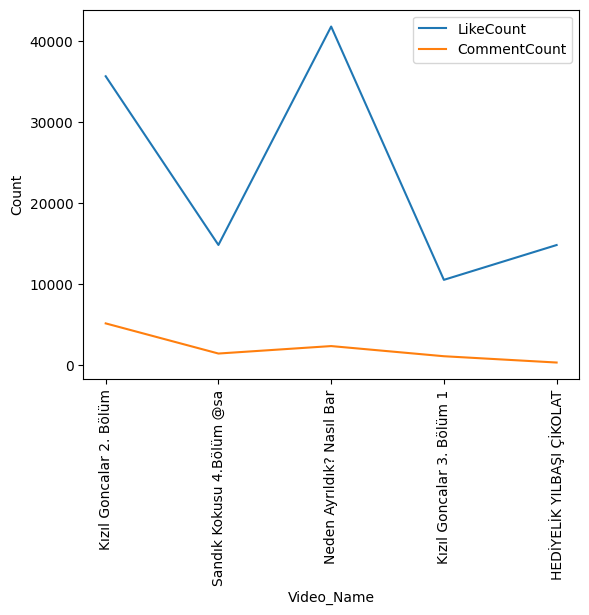

In [34]:

# Create a line plot with three lines
plt.plot(TR_Youtube_Most_Pop['channelName'], TR_Youtube_Most_Pop['LikeCount'], label='LikeCount')
plt.plot(TR_Youtube_Most_Pop['channelName'], TR_Youtube_Most_Pop['CommentCount'], label='CommentCount')


# Add labels and a legend

plt.xlabel('Video_Name')
plt.ylabel('Count')
plt.legend()

# Rotate x-axis labels
plt.xticks(rotation=90)  # You can adjust the rotation angle as needed
# Show the plot
plt.show()


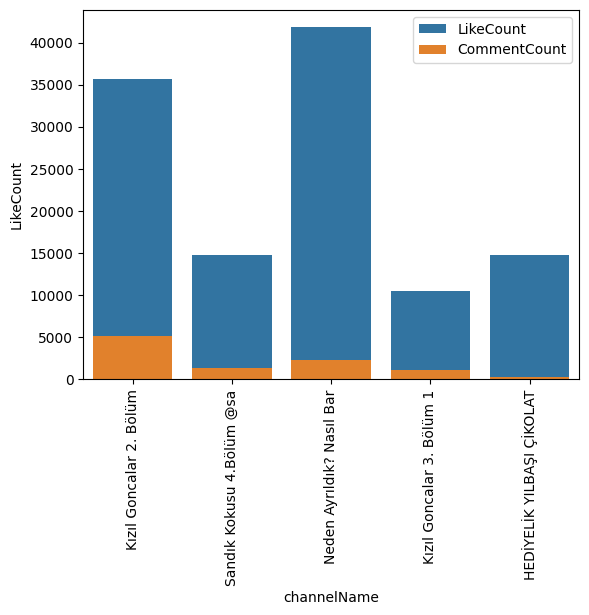

In [15]:
sns.barplot(TR_Youtube_Most_Pop, x="channelName", y="LikeCount",label="LikeCount")
sns.barplot(TR_Youtube_Most_Pop, x="channelName", y="CommentCount",label="CommentCount")
plt.legend(loc='best') # to see legend
plt.xticks(rotation=90)  # You can adjust the rotation angle as needed
# Show the plot
plt.show()

#Output: As you see, in movies views are higher than classic short videos but like count is almost equal to major view channelname.

In [16]:
TR_Youtube_Most_Pop.insert(2,'LikeC/Views',TR_Youtube_Most_Pop['LikeCount'].astype(int) / TR_Youtube_Most_Pop['views'].astype(int))


In [17]:
TR_Youtube_Most_Pop.sort_values(by=['LikeC/Views'])

,channelName,PublishTime,LikeC/Views,views,LikeCount,CommentCount,Duration,videoID
0,Sandık Kokusu 4.Bölüm @sa,2023-12-27T21:01:41Z,0.009195,1612314,14826,1419,PT2H14M6S,_LVk6qMiF5U
4,Kızıl Goncalar 2. Bölüm,2023-12-25T19:32:41Z,0.011939,2986718,35659,5141,PT2H4M12S,5nXRi1dkRps
1,Kızıl Goncalar 3. Bölüm 1,2023-12-28T16:04:56Z,0.013954,753829,10519,1086,PT47S,4vmbDdll96g
3,HEDİYELİK YILBAŞI ÇİKOLAT,2023-12-28T15:55:26Z,0.036574,405127,14817,308,PT33S,dw9gDNZKHR0
2,Neden Ayrıldık? Nasıl Bar,2023-12-27T15:29:18Z,0.045446,919781,41800,2340,PT28M,aWaJSJmsy3c


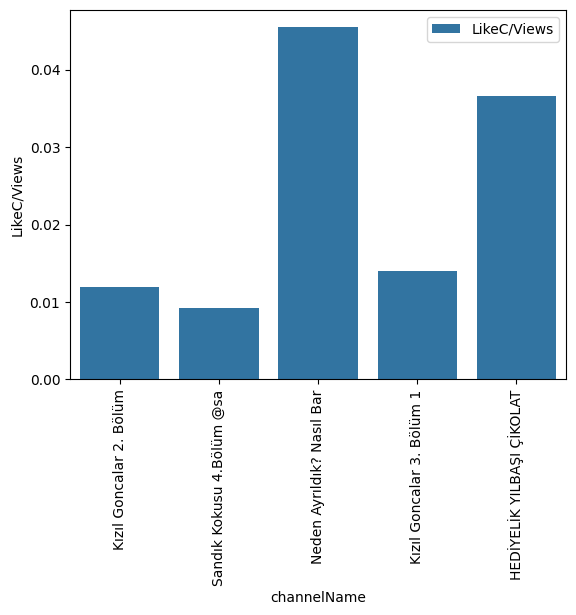

In [18]:
sns.barplot(TR_Youtube_Most_Pop, x="channelName", y="LikeC/Views",label="LikeC/Views")
# Rotate x-axis labels
plt.xticks(rotation=90)  # You can adjust the rotation angle as needed
plt.show()

#Output : I want to anlyze LikeC/Views ratio. And daily videos are higher than movies.

In [19]:
MP=TR_Youtube_Most_Pop.sort_values(by=['LikeC/Views'])

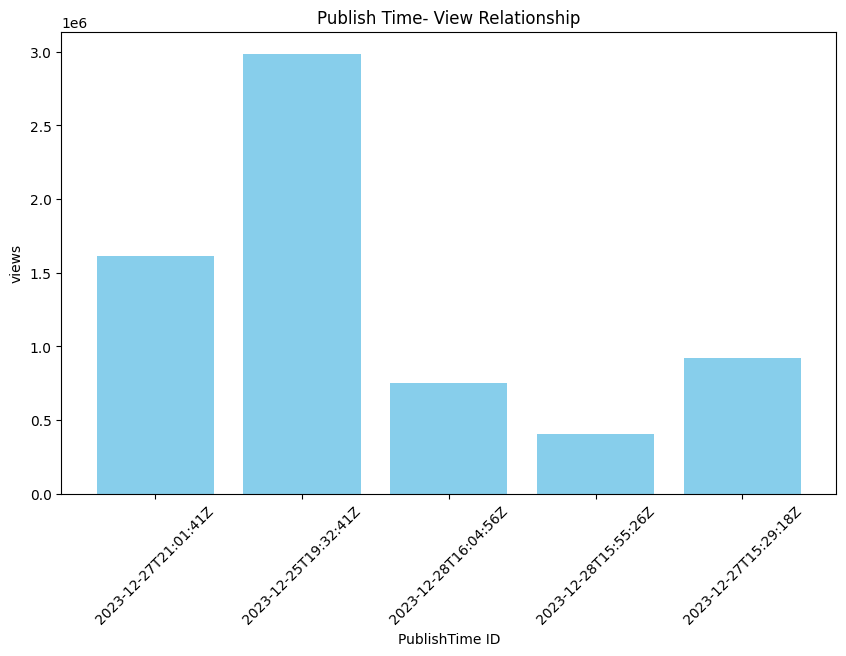

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(MP['PublishTime'], MP['views'], color='skyblue')
plt.xlabel('PublishTime ID')
plt.ylabel('views')
plt.title('Publish Time- View Relationship')
plt.xticks(rotation=45)
plt.show()

#Output: We cant say directly earlier time equals to high view.

I will analyze the ;
- higher viewer channel          : Kızıl Goncalar 2.bölüm         Video ID :5nXRi1dkRps
- higher like/view ratio Channel : Neden Ayrıldık?Nasıl Barıstık  Video ID :aWaJSJmsy3c

#### Kızıl Goncalar

CommentThreads by Video_ID

In [21]:
request = youtube.commentThreads().list(
        part="snippet,replies",
        videoId="5nXRi1dkRps" # KIzıl Goncalar Video ID
    )
response = request.execute()

#print(response) for clear output ı write as an comment of code.

Json code converter :

- https://www.objgen.com/json/local/rh49EaBVJ
- https://jsonformatter.org/json-editor

Method For Function 

In [22]:
def get_commentThreads(youtube):
    all_data = []

# This request method is defined as below . You can include what you want in part. 
    # https://developers-dot-devsite-v2-prod.appspot.com/youtube/v3/docs/commentThreads/list?apix=true#usage you can look detailly.
    
    request = youtube.commentThreads().list(
        part="snippet,replies",
         maxResults=5000,
        videoId="5nXRi1dkRps" # KIzıl Goncalar Video ID
    )
    response = request.execute()

    #print(response) for clear output ı write as an comment of code.


    # loop through items in response
    #json webpage ( https://jsonformatter.org/json-editor) is sooo good to anayze.
    for item in response["items"]:
        data = {'textDisplay':item['snippet']['topLevelComment']['snippet']['textDisplay'],
                'authorDisplayName': item['snippet']['topLevelComment']['snippet']['authorDisplayName'],
                'likeCount':item['snippet']['topLevelComment']['snippet']['likeCount']

        }
        all_data.append(data)
    return pd.DataFrame(all_data)



Method for Get Comments

In [23]:
# Get comments for the specified video
comments = []
nextPageToken = None

while True:
    request = youtube.commentThreads().list(
        part="snippet,replies",
        videoId="5nXRi1dkRps",
        maxResults=100,  # Adjust as needed
        pageToken=nextPageToken
    )
    response = request.execute()

    for item in response["items"]:
        comment = item["snippet"]["topLevelComment"]["snippet"]["textDisplay"]
        comments.append(comment)

    nextPageToken = response.get("nextPageToken")

    if not nextPageToken:
        break

# Print or use the retrieved comments
for comment in comments:
    print(comment)

Kızıl Goncalar 2. bölümü nasıl buldunuz?<br>Yorumlarınızı bekliyorum👇👇
Burada hala İslam&#39;ı kötülüyor diyenler var. Tarikatları benimsemişler ve islamın bir parcası sanıyorlar. Gercekten ülkenin hali bu işte. İmamhatip denen şey bu alanda gelişmem ve ilerlemek isteyen insnalar için var. Her yere açılması ve okulların buna dönüştürülmesi demek kalitesiz egitim demek. Zaten imamhatip ortamladi okuyanlar hilir rezildir. Baskı altında kalmış, zorla gönderilmiş, uğraşmak istemeyen çocuklarıyla orada hepsi var. Ortam gerçekten çok kötü.
Diziye Sırbistan  da Bosna da Romanya da bulgaristan  da , devam cekin türkiye sorun yaparsa
Tarikatlerin şirk yuvası olduğunu herkes bilsin
Adamın sakalını niue kestirdiler anlayamadım
Ben diziyi çok beğendim ❤
cok ilginc zamanlama karanlik bir dönemden gecerken kürt ve türk halklarinin liderlerinin cözümü Tarikatlarda aradigi bir dönemdeyiz.,dizinin sonu nasil bitecek acaba diye merak ettim zeynep ikiz kardesinle kolejemi gidecek? yoksa cüneytle mutlu bi

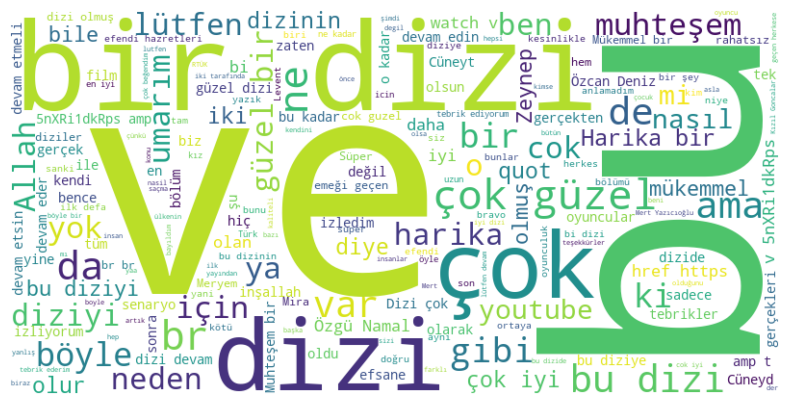

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'comments' is your list of comments

# Combine all comments into a single string
all_comments_text = ' '.join(comments)

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments_text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

In [25]:
get_commentThreads(youtube).sort_values(by="likeCount",ascending=False)


# Chanel ID =  'UCvMf-BavX_3YjG-JPrpPqLw


,textDisplay,authorDisplayName,likeCount
0,Kızıl Goncalar 2. bölümü nasıl buldunuz?<br>Yo...,@KizilGoncalarDizisi,2168
84,Həmişə belə xurafatlara nifrət eləmişəm.Bir də...,@elcinmhrrmov7271,2
51,Ozcan denizi bile izlettiniz ya.abi bu nasil b...,@saidkaya577,2
61,"Tüm dinlerin, denizin dibini boylamasını isti...",@uhruc1937,2
63,"22 yıldır yurtdışındayım, bir tane bile dizi i...",@commodoreras,2
...,...,...,...
1,Burada hala İslam&#39;ı kötülüyor diyenler var...,@edabkr,0
49,Biz garibanlar fabrikada vardiyamızı tamamladı...,@erenozgur9348,0
48,"Tek solukta izledim, harika bir dizi.",@FerdaGonca,0
47,"Örümcek kafalılar, foyaları ortaya çıkacak diy...",@georgianabordea7049,0


##### Channel Sections Analysis by Channel ID 

In [26]:
request = youtube.channelSections().list(
        part="snippet,contentDetails",
        channelId="UCvMf-BavX_3YjG-JPrpPqLw"
    )
response = request.execute()

#print(response) for clear output ı write as an comment of code.

In [27]:
def get_ChannelSections(youtube):
    all_data = []
    
    request = youtube.channelSections().list(
        part="snippet,contentDetails",
        channelId='UCvMf-BavX_3YjG-JPrpPqLw'
    )
    response = request.execute()


    for item in response.get("items", []):
        data = {'ID':item["id"],
                'Type': item["snippet"]["type"]}
        all_data.append(data)
    return pd.DataFrame(all_data)

In [28]:
get_ChannelSections(youtube)

,ID,Type
0,UCvMf-BavX_3YjG-JPrpPqLw.jNQXAC9IVRw,singleplaylist
1,UCvMf-BavX_3YjG-JPrpPqLw.LeAltgu_pbM,singleplaylist
2,UCvMf-BavX_3YjG-JPrpPqLw.nGzAI5pLbMY,singleplaylist
3,UCvMf-BavX_3YjG-JPrpPqLw.__WLXNpu6u8,singleplaylist
4,UCvMf-BavX_3YjG-JPrpPqLw.Zx4DA4xg9IM,recentuploads
5,UCvMf-BavX_3YjG-JPrpPqLw.MykmTeTiooA,singleplaylist
6,UCvMf-BavX_3YjG-JPrpPqLw.iJLXf_7B368,singleplaylist
7,UCvMf-BavX_3YjG-JPrpPqLw.UgY69lf0UCE,singleplaylist
8,UCvMf-BavX_3YjG-JPrpPqLw.ebKlgRwnpFY,singleplaylist
9,UCvMf-BavX_3YjG-JPrpPqLw.aqsRo9JYx5M,channelsectiontypeundefined


#### Neden Ayrıldık? Nasıl Barıştık?

In [29]:
def get_commentThreads(youtube):
    all_data = []

# This request method is defined as below . You can include what you want in part. 
    # https://developers-dot-devsite-v2-prod.appspot.com/youtube/v3/docs/commentThreads/list?apix=true#usage you can look detailly.
    
    request = youtube.commentThreads().list(
        part="snippet,replies",
         maxResults=5000,
        videoId="aWaJSJmsy3c" # Nasıl Ayrıldık? Nasıl Barıştık Video ID
    )
    response = request.execute()

    #print(response) for clear output ı write as an comment of code.


    # loop through items in response
    #json webpage ( https://jsonformatter.org/json-editor) is sooo good to anayze.
    for item in response["items"]:
        data = {'textDisplay':item['snippet']['topLevelComment']['snippet']['textDisplay'],
                'authorDisplayName': item['snippet']['topLevelComment']['snippet']['authorDisplayName'],
                'likeCount':item['snippet']['topLevelComment']['snippet']['likeCount'],
                'publishedAt':item['snippet']['topLevelComment']['snippet']['publishedAt'],
                'totalReplyCount':item['snippet']['totalReplyCount']
        }
        all_data.append(data)
    return pd.DataFrame(all_data)

In [30]:
get_commentThreads(youtube)

,textDisplay,authorDisplayName,likeCount,publishedAt,totalReplyCount
0,Güzel yorumlarınız için çok teşekkür ederiz o ...,@BetulCakmak5,1764,2023-12-27T16:08:00Z,58
1,Birinize saygınız çok güzel ve. Sevginizde😊❤h...,@AgAh-zg6cr,0,2023-12-29T11:19:41Z,0
2,Örnek ilişki yeni dönemde budur. Gelecek nesil...,@yabanc3719,0,2023-12-29T11:15:22Z,0
3,Asla aynı his kalmamış bence sadece eski günle...,@betulaydn7727,0,2023-12-29T11:13:32Z,0
4,Para,@muhammetemindaml7158,0,2023-12-29T10:51:19Z,0
...,...,...,...,...,...
95,"naber , iyiymisin , selam",@JONW_,0,2023-12-28T21:14:28Z,0
96,Önüme eski videoları çıktı sandım o kadar sevi...,@semakucuksarii,0,2023-12-28T21:13:42Z,0
97,Siz sevgili miydiniz inanamıyorum 😮 artık hep ...,@duyguc7805,0,2023-12-28T21:10:28Z,0
98,Betül prim için yapmadıgın şey yok,@BrawlStars-nk1tc,3,2023-12-28T21:08:38Z,1


In [31]:
# Get comments for the specified video
comments = []
nextPageToken = None

while True:
    request = youtube.commentThreads().list(
        part="snippet,replies",
        videoId="aWaJSJmsy3c",
        maxResults=100,  # Adjust as needed
        pageToken=nextPageToken
    )
    response = request.execute()

    for item in response["items"]:
        comment = item["snippet"]["topLevelComment"]["snippet"]["textDisplay"]
        comments.append(comment)

    nextPageToken = response.get("nextPageToken")

    if not nextPageToken:
        break

# Print or use the retrieved comments
for comment in comments:
    print(comment)  # for clear output ı write as an comment of code.

Güzel yorumlarınız için çok teşekkür ederiz o kadar mutlu ediyor ki bizi ❤️ iyi ki varsınız 🤍
Birinize saygınız çok güzel  ve. Sevginizde😊❤harika ikili❤
Örnek ilişki yeni dönemde budur. Gelecek nesillere geçmiş olsun.
Asla aynı his kalmamış bence sadece eski günleri özlemişsiniz ikinizde aynı insan değilsiniz tabiki ve çoktan bitmiş bir ilişki gibi geliyor bu bana küllerinden doğacak bir kıvılcım kalmamış
Para
Aaaa 😊❤
Aşka inancımm tekrarrr geldii yerine oturduu❤❤❤❤❤❤
Betül ablanın parası bitmiştir saygılar
E o zaman siz evlenemezsiniz ki, neden barıştınız ?
İnşallah ilişkiniz güzel ve mutlu devam eder birbirinizi üzmeyin çok seviyorum siziiii yeni videolar bekliyoruz 💖
Bunlar kardeş değilmiydiler?
Abi bu kiz bana hala primci geliyo
<a href="https://www.youtube.com/watch?v=aWaJSJmsy3c&amp;t=2m30s">2:30</a> 8 yıl ayrılmamışlar evli olarak düşününmüş evli olmak ile sevgili olmak ayrı şeyler birde bu kadar birlikte yaşayıp ayrıldıysanız evlilik nasıl olacak 😂😂
1M izlenmiş neredeyse gerçek

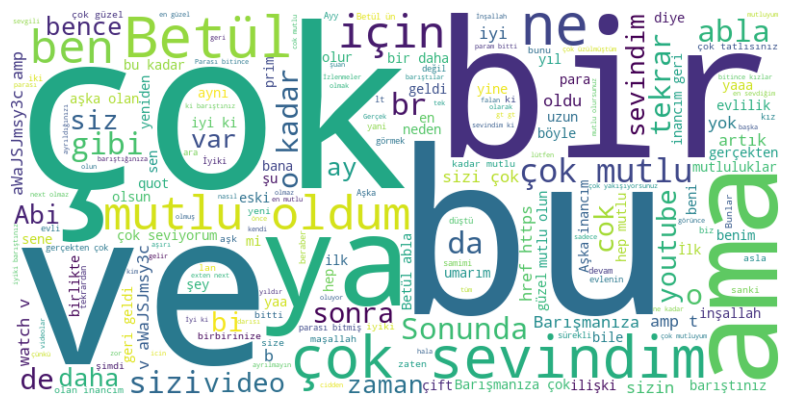

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all comments into a single string
all_comments_text = ' '.join(comments)

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments_text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

In [33]:
get_commentThreads(youtube).sort_values(by="likeCount",ascending=False).head(100)

,textDisplay,authorDisplayName,likeCount,publishedAt,totalReplyCount
0,Güzel yorumlarınız için çok teşekkür ederiz o ...,@BetulCakmak5,1764,2023-12-27T16:08:00Z,58
99,Nedense bana suan cok yapmacik noye geldi anla...,@sevcantorenuludag5401,5,2023-12-28T21:02:32Z,0
11,Abi bu kiz bana hala primci geliyo,@nihan-fp3xv,4,2023-12-29T09:59:37Z,0
92,ya bizene siz kimsiniz ve trendlerde ne işiniz...,@cananktss2592,4,2023-12-28T21:29:14Z,1
79,Lan gardaş nasıl kabul ediyon kaç adam girip ç...,@fermandeniz7374,3,2023-12-28T23:16:12Z,1
...,...,...,...,...,...
39,abim sen ilişkide betalaşmışsın. İpleri kadını...,@-ibrahim06,0,2023-12-29T07:14:27Z,0
37,Günlerden birgün bir adam evinin önünde duran ...,@burak4636,0,2023-12-29T07:29:56Z,0
36,Betül baktı ki kanalı batıyor zekice bir hamle...,@wxp12_,0,2023-12-29T07:39:18Z,0
35,3 ay sonra (kanallarının izlenmesi yükselsin) ...,@wxp12_,0,2023-12-29T07:40:44Z,0
